<h1><center>Netflix exploratory data analysis and visualization</center></h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
netflix_data =pd.read_csv("netflix_titles.csv")

In [3]:
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
np.sort(netflix_data.release_year.unique())

array([1925, 1942, 1943, 1944, 1945, 1946, 1947, 1954, 1955, 1956, 1958,
       1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
       1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021], dtype=int64)

<H1><center>Top 10 release years by number of releases</center><H1>

In [5]:
top_10_release_years=netflix_data.release_year.value_counts().sort_values()[-10:]
top_10_release_years_df=pd.DataFrame(top_10_release_years)
top_10_release_years_df['year']=top_10_release_years_df.index
top_10_release_years_df['count']=top_10_release_years_df.release_year
top_10_release_years_df=top_10_release_years_df.drop('release_year',axis=1)
top_10_release_years_df.index=range(0,top_10_release_years_df.shape[0])

In [6]:
top_10_release_years_df=top_10_release_years_df.sort_values('year')
top_10_release_years_df

,year,count
0,2012,237
1,2013,288
2,2014,352
3,2015,560
5,2016,902
8,2017,1032
9,2018,1147
7,2019,1030
6,2020,953
4,2021,592


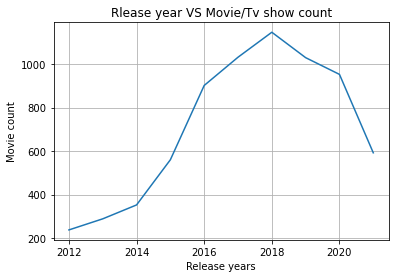

In [7]:
plt.plot(top_10_release_years_df.year,top_10_release_years_df['count'])
plt.grid(True)
plt.xlabel("Release years")
plt.ylabel("Movie count")
plt.title("Rlease year VS Movie/Tv show count")
plt.show()

##### We can see the count of release of movies and TV shows are declining from 2018 .
##### Which may indicate the effect of COVID-19 on movie / Tv production
##### Study around the revenue loss in Entertainment(movie and TV )industry due to COVID-19 in wiki -:
https://en.wikipedia.org/wiki/Impact_of_the_COVID-19_pandemic_on_cinema

<H1><center>Top 10 countries by number of movie/TV releases</center><H1>

In [8]:
top_ten_countries_for_movie_production=netflix_data.country.value_counts()[:10]
top_ten_countries_for_movie_production.index

Index(['United States', 'India', 'United Kingdom', 'Japan', 'South Korea',
       'Canada', 'Spain', 'France', 'Mexico', 'Egypt'],
      dtype='object')

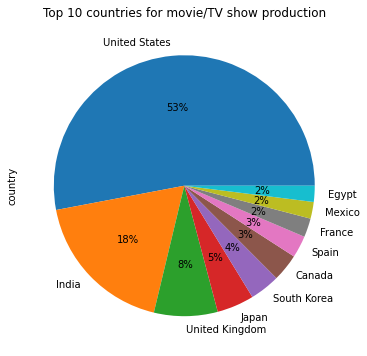

In [9]:
plt.figure(figsize=[6,6])
top_ten_countries_for_movie_production.plot.pie(autopct='%.0f%%')
plt.title('Top 10 countries for movie/TV show production')
plt.show()

In [10]:
netflix_data['type']=netflix_data.type.map({'Movie':1,'TV Show':0})
listof_top10_countries_by_movie_production=list(top_ten_countries_for_movie_production.index)


In [11]:
listof_top10_countries_by_movie_production

['United States',
 'India',
 'United Kingdom',
 'Japan',
 'South Korea',
 'Canada',
 'Spain',
 'France',
 'Mexico',
 'Egypt']

In [12]:
filter_topcountries=[]
for i in netflix_data['country']:
    if i in listof_top10_countries_by_movie_production:
        filter_topcountries.append(True)
    else:
        filter_topcountries.append(False)


In [13]:
topcountries_df=netflix_data[filter_topcountries]

<H2><center>Movie /TV prdoduction count by top 10 countries</center><H2>

In [14]:
group=topcountries_df.groupby('country')

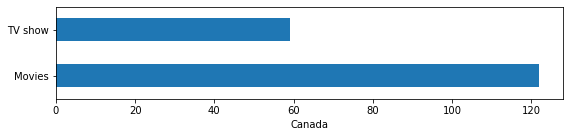

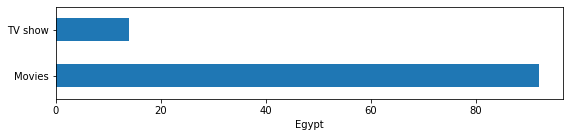

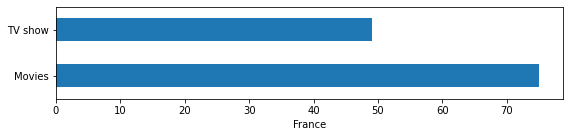

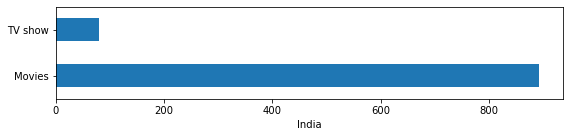

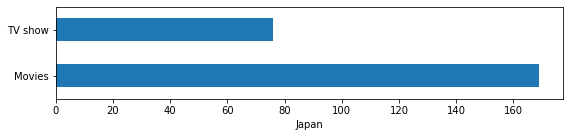

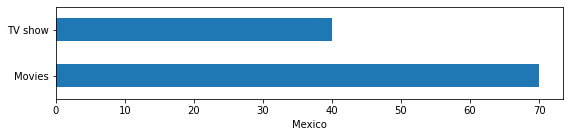

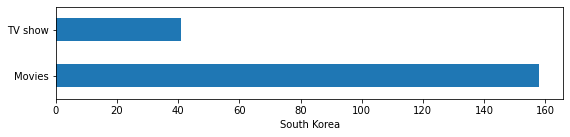

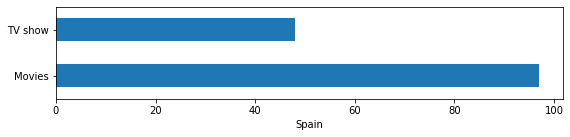

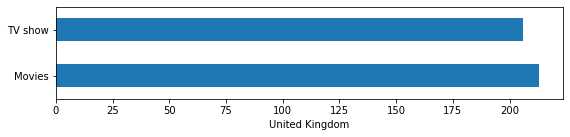

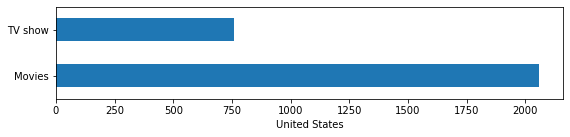

In [15]:
i=1
for g,l in group:
    plt.figure(figsize=[20,20])
    plt.subplot(10,2,i)
    l.type.value_counts().plot.barh()
    i +=1
    plt.xlabel(g)
    plt.yticks([0,1],['Movies','TV show'])
    plt.show()